In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mtp
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [36]:
df=pd.read_csv("CO2_Emissions_Canada.csv")

In [37]:
df.head()

,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,CO2_Emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make                   7385 non-null   object 
 1   Model                  7385 non-null   object 
 2   Vehicle_Class          7385 non-null   object 
 3   Engine_Size            7385 non-null   float64
 4   Cylinders              7385 non-null   int64  
 5   Transmission           7385 non-null   object 
 6   Fuel_Type              7385 non-null   object 
 7   Fuel_Consumption_City  7385 non-null   float64
 8   Fuel_Consumption_Hwy   7385 non-null   float64
 9   Fuel_Consumption_Comb  7385 non-null   float64
 10  CO2_Emissions          7385 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 634.8+ KB


In [39]:
# From the data info we can find there is no missing data in any feature

In [40]:
# transform categorical data – numerical data by one hot encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x1 = df.Make.values
encoder.fit(x1)
df['Make'] = encoder.transform(x1)

In [41]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x2 = df.Model.values
encoder.fit(x2)
df['Model'] = encoder.transform(x2)

In [42]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x3 = df.Vehicle_Class.values
encoder.fit(x3)
df['Vehicle_Class'] = encoder.transform(x3)

In [43]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x4 = df.Transmission.values
encoder.fit(x4)
df['Transmission'] = encoder.transform(x4)

In [44]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x5 = df.Fuel_Type.values
encoder.fit(x5)
df['Fuel_Type'] = encoder.transform(x5)

In [45]:
df.head()

,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,CO2_Emissions
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,244


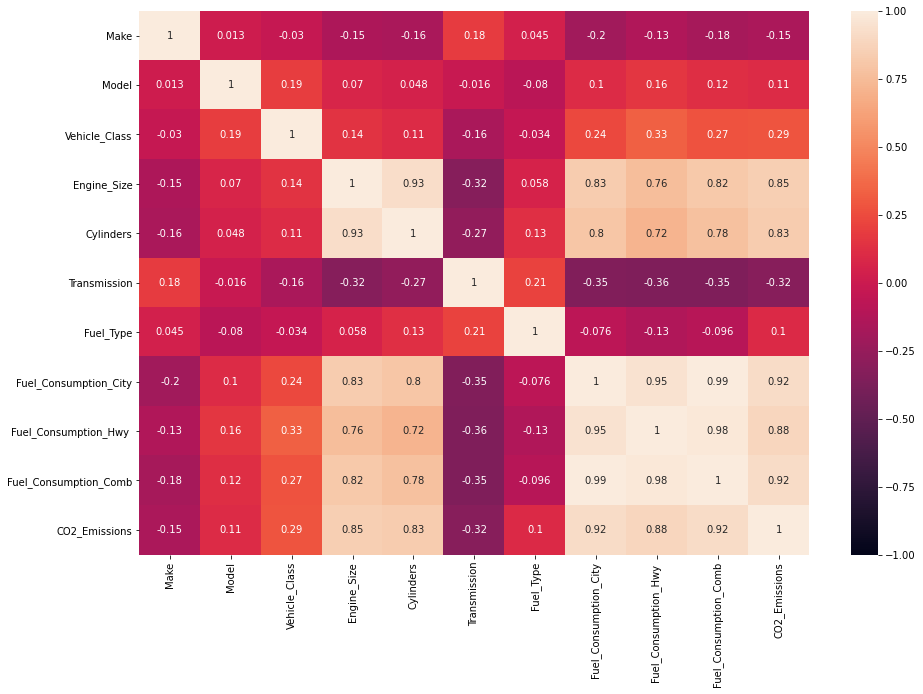

In [46]:


mtp.figure(figsize = (15,10))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True);


<function matplotlib.pyplot.show(close=None, block=None)>

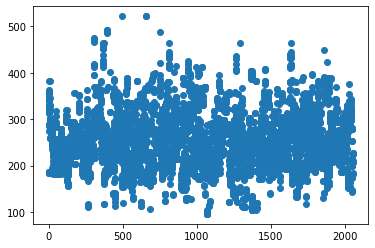

In [47]:
x=df['Model']
y=df['CO2_Emissions']
mtp.scatter(x,y)
mtp.show

<function matplotlib.pyplot.show(close=None, block=None)>

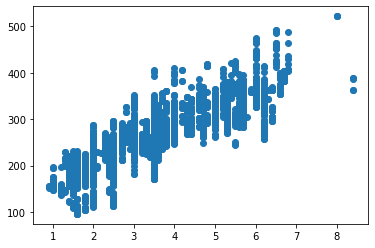

In [48]:
x=df['Engine_Size']
y=df['CO2_Emissions']
mtp.scatter(x,y)
mtp.show

From the correlation analysis we can find the fuel consumption(city/hwy/comb) is high related to CO2 Emissions, so we pick the other parameters as feature, and also, there is no other feature dropped.

In [49]:
df.reset_index(drop=True,inplace=True)
df.dropna(inplace=True)
df

,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,CO2_Emissions
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,244
...,...,...,...,...,...,...,...,...,...,...,...
7380,41,1951,11,2.0,4,17,4,10.7,7.7,9.4,219
7381,41,1957,11,2.0,4,17,4,11.2,8.3,9.9,232
7382,41,1960,11,2.0,4,17,4,11.7,8.6,10.3,240
7383,41,1968,12,2.0,4,17,4,11.2,8.3,9.9,232


In [50]:
df_independent=df[["Make","Model","Vehicle_Class","Engine_Size","Cylinders","Transmission","Fuel_Type"]]

In [51]:
# Split the data to training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_independent, df['CO2_Emissions'], test_size = 0.20, random_state = 0)

In [52]:
df_lg= X_train

In [53]:
df_lg['CO2_Emissions']=y_train

<ipython-input-53-1cae21473cf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lg['CO2_Emissions']=y_train


In [54]:
import statsmodels.formula.api as smf

# Fit linear regression using statsmodels
linear_reg = smf.ols('CO2_Emissions ~ Make + Model+ Vehicle_Class+Engine_Size+Cylinders+Transmission+Fuel_Type', data = df_lg).fit()
linear_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CO2_Emissions   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     2822.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:01:48   Log-Likelihood:                -28081.
No. Observations:                5908   AIC:                         5.618e+04
Df Residuals:                    5900   BIC:                         5.623e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       104.3561      2.116     49.314      0.000     100.208     108.505
Make             -0.0468      0.033     -1.414      0.157      -0.112       0.018
Model             0.0024      0.001      3.682      0.000       0.001       0.004
Vehicle_Class     2.0419      0.079     25.987      0.000       1.888       2.196
Engine_Size      21.2942      0.745     28.589      0.000      19.834      22.754
Cylinders        10.6977      0.547     19.546      0.000       9.625      11.771
Transmission     -0.4001      0.056     -7.192      0.000      -0.509      -0.291
Fuel_Type         3.0491      0.437      6.979      0.000       2.193       3.906
==============================================================================
Omnibus:                      166.530   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              395.719
Skew:                           0.100   Prob(JB):                     1.18e-86
Kurtosis:                       4.252   Cond. No.                     6.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score, explained_variance_score

X_train, X_test, y_train, y_test = train_test_split(df_independent, df['CO2_Emissions'], test_size = 0.20, random_state = 0)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

X_train (5908, 7)
y_train (5908,)
X_test (1477, 7)
y_test (1477,)


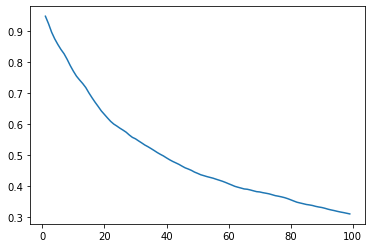

In [56]:
# knn
from sklearn.neighbors import KNeighborsRegressor
score_list = []
for k in range(1,100):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    score_list.append(knn.score(X_test,y_test))
    
import matplotlib.pyplot as plt
plt.plot(range(1,100), score_list)

In [57]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = knn.score(X_test,y_test)
print(knn_acc)

0.9490218997072437


In [58]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor().fit(X_train, y_train)
knn_model
y_pred = knn_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))
knn_model.score(X_train, y_train)
knn_model.score(X_test, y_test)

from sklearn.model_selection import GridSearchCV
knn_params = {'n_neighbors': np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

knn_cv_model.fit(X_train, y_train)
knn_cv_model.best_params_["n_neighbors"]
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

knn_tuned.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

mse = round(np.sqrt(mean_squared_error(y_test,y_pred)),4)
print('Mean Squared Error (MSE): ',mse)
print('R- Squared (R-square): ',r2_score(y_test,y_pred))

print('KNN Acuracy:', knn_acc)

Mean Squared Error (MSE):  22.0692
R- Squared (R-square):  0.857821698612464
KNN Acuracy: 0.9490218997072437


In [59]:
# The whole inputs and outputs.
X = df_independent
y = df['CO2_Emissions']

Text(0.5, 0, 'Relative Importance')

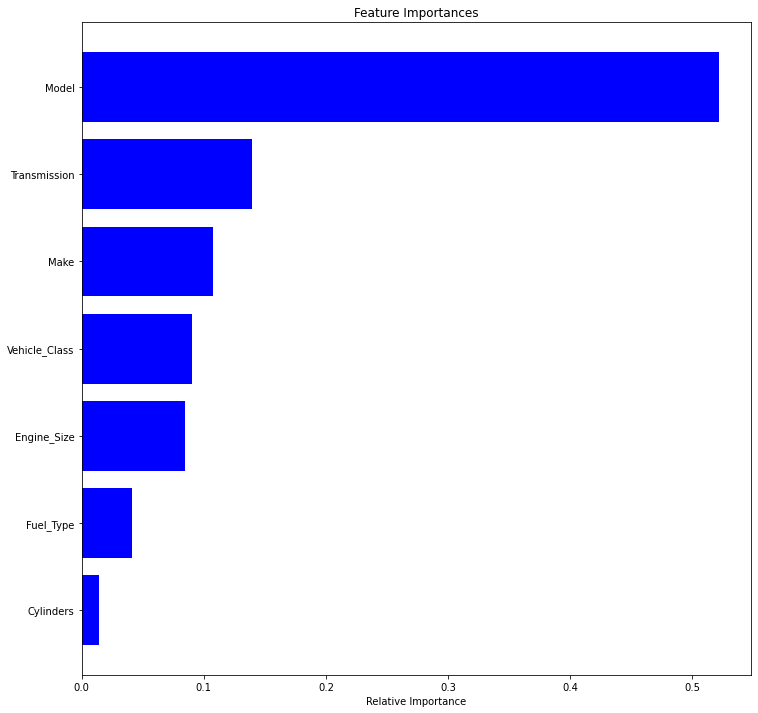

In [60]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train,np.ravel(y_train))

import matplotlib.pyplot as plt
%matplotlib inline
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),np.array(["Make","Model","Vehicle_Class","Engine_Size","Cylinders","Transmission","Fuel_Type"])[indices])
plt.xlabel('Relative Importance')

In [61]:
# Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

parameters = {
     'n_estimators':(10,30), 
     'max_samples':(.30,.50,1.0), 
     'max_features':(1,3,5,7),
}

model1 = GridSearchCV(BaggingClassifier(),parameters,cv=3)
model1.fit(X,y)
model1.best_score_, model1.best_params_

C:\Users\wssh1\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


(0.194715988043316,
 {'max_features': 5, 'max_samples': 1.0, 'n_estimators': 30})

In [62]:
rf = BaggingClassifier(max_samples=1.0,n_estimators=30,max_features=5)
rf.fit(X_train,y_train)
rf_acc = rf.score(X_test,y_test)
print(rf_acc)

# Test the model Metrics
y_pred = rf.predict(X_test)

mse = round(np.sqrt(mean_squared_error(y_test,y_pred)),4)
print('Mean Squared Error (MSE): ',mse)
print('R- Squared (R-square): ',r2_score(y_test,y_pred))


0.26472579553148273
Mean Squared Error (MSE):  10.9905
R- Squared (R-square):  0.9647390157948054


In [70]:
#XGB
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score, explained_variance_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import catboost as ctb
from xgboost.sklearn import XGBRegressor

np.random.seed(7)

In [67]:

from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb1 = XGBRegressor()
parameters = {'nthread':[4], 
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07, 0.015], 
              'max_depth': [5, 6, 7, 10],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500,700, 1000]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        scoring = 'neg_mean_squared_error',
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 48 candidates, totalling 96 fits
[17:07:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

-132.80372592206544
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 10, 'min_child_weight': 4, 'n_estimators': 1000, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.7}


In [68]:
from numpy import asarray
from numpy import mean
from numpy import std

In [71]:
best_param = xgb_grid.best_params_

# evaluate the model
model = XGBRegressor(objective='reg:squarederror',
                     colsample_bytree = best_param['colsample_bytree'],
                     learning_rate = best_param['learning_rate'],
                     max_depth = best_param['max_depth'],
                     min_child_weight = best_param['min_child_weight'],
                     n_estimators = best_param['n_estimators'],
                     n_thread = 4)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train,
                           scoring='neg_root_mean_squared_error',
                           cv=cv, n_jobs=-1,
                           error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = XGBRegressor(objective='reg:squarederror',
                     colsample_bytree = best_param['colsample_bytree'],
                     learning_rate = best_param['learning_rate'],
                     max_depth = best_param['max_depth'],
                     min_child_weight = best_param['min_child_weight'],
                     n_estimators = best_param['n_estimators'],
                     n_thread = 4)
model.fit(X_train, y_train)

#Test the model
y_pred = model.predict(X_test)

pred = model.predict(X_test)
frames = [pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred=result_pred.T

result_pred_XGB=result_pred.rename(columns={0:'Pred_XGB',1:'Real'})
result_pred_XGB["Pred_XGB"]=result_pred_XGB["Pred_XGB"].map(lambda x:round(x,2))
result_pred_XGB["Diff"]=result_pred_XGB["Pred_XGB"]-result_pred_XGB["Real"]
result_pred_XGB["Diff"]=result_pred_XGB["Diff"]
print("Mean Diff: ",abs(result_pred_XGB["Diff"]).mean())
result_pred_XGB.head(20)

mse = round(np.sqrt(mean_squared_error(y_test,y_pred)),4)
print('Mean Squared Error (MSE): ',mse)
print('R- Squared (R-square): ',r2_score(y_test,y_pred))


MAE: -9.954 (0.817)
[17:09:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_thread" } are not used.

Mean Diff:  6.576269465132016
Mean Squared Error (MSE):  9.4425
R- Squared (R-square):  0.9739723009654976
